<a href="https://colab.research.google.com/github/mcmathiesen/super-potato/blob/main/Assignment5Mathiesen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [4]:
df['Flower'] = iris.target

In [5]:
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  ...  petal width (cm)  Flower
0                  5.1               3.5  ...               0.2       0
1                  4.9               3.0  ...               0.2       0
2                  4.7               3.2  ...               0.2       0
3                  4.6               3.1  ...               0.2       0
4                  5.0               3.6  ...               0.2       0
..                 ...               ...  ...               ...     ...
145                6.7               3.0  ...               2.3       2
146                6.3               2.5  ...               1.9       2
147                6.5               3.0  ...               2.0       2
148                6.2               3.4  ...               2.3       2
149                5.9               3.0  ...               1.8       2

[150 rows x 5 columns]>

In [6]:
km = KMeans(n_clusters=3)
clust = km.fit_predict(df)
clust

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [7]:
df['cluster'] = clust
df.cluster.unique()

array([1, 2, 0], dtype=int32)

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==3]

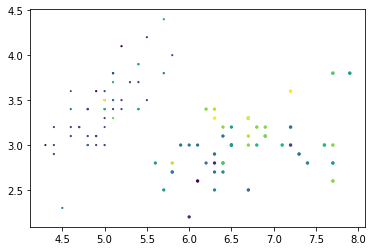

In [9]:
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],df1['petal length (cm)'],df1['petal width (cm)'])
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],df2['petal length (cm)'],df2['petal width (cm)'])
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],df3['petal length (cm)'],df3['petal width (cm)'])

In [10]:
sse = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df)
  sse.append(km.inertia_)


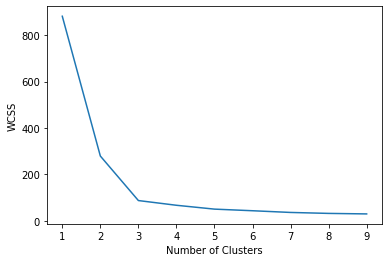

In [11]:
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.plot(k_rng,sse)

In [47]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version =1, return_X_y=True)


In [14]:
mnist = fetch_openml('mnist_784')
x=mnist.data
y=mnist.target
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x, y, cv=10, scoring = 'accuracy')
print (scores)

[0.97285714 0.96871429 0.97128571 0.97314286 0.97228571 0.97171429
 0.96657143 0.96771429 0.96957143 0.97642857]


In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [24]:


X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, random_state=11) 

In [25]:
X_train.shape

(52500, 784)

In [27]:
y_train.shape

(52500,)

In [28]:
X_test.shape

(17500, 784)

In [30]:
y_test.shape

(17500,)

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2, random_state=11)

In [36]:
pca.fit(mnist.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=11,
    svd_solver='auto', tol=0.0, whiten=False)

In [44]:
mnist_pca = pca.transform(mnist.data)

In [38]:
mnist_pca.shape

(70000, 2)

In [39]:
mnist_pca_df = pd.DataFrame(mnist_pca)

In [40]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [46]:
x=mnist_pca
y=mnist.target
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x, y, cv=20, scoring = 'accuracy')
print (scores)

[0.41942857 0.42114286 0.40857143 0.40685714 0.40657143 0.406
 0.42171429 0.406      0.41371429 0.40428571 0.41142857 0.40514286
 0.40085714 0.41914286 0.41028571 0.42857143 0.42657143 0.40314286
 0.42457143 0.41885714]
